In [1]:
import re
import pandas as pd
import numpy as np
import jovian
from wordcloud import wordcloud, STOPWORDS
import emoji
import seaborn as sns
import matplotlib.pyplot as plt



<IPython.core.display.Javascript object>

In [2]:
gsc = pd.read_csv("C:\\Users\\KARNDEEP SINGH\\Downloads\\gsc.txt", encoding = "utf-8", error_bad_lines= False)

b'Skipping line 41: expected 2 fields, saw 3\nSkipping line 126: expected 2 fields, saw 4\nSkipping line 143: expected 2 fields, saw 3\nSkipping line 203: expected 2 fields, saw 3\nSkipping line 246: expected 2 fields, saw 3\nSkipping line 254: expected 2 fields, saw 3\nSkipping line 286: expected 2 fields, saw 3\nSkipping line 368: expected 2 fields, saw 3\nSkipping line 404: expected 2 fields, saw 4\nSkipping line 574: expected 2 fields, saw 3\nSkipping line 597: expected 2 fields, saw 7\nSkipping line 873: expected 2 fields, saw 9\nSkipping line 943: expected 2 fields, saw 10\nSkipping line 988: expected 2 fields, saw 3\nSkipping line 1076: expected 2 fields, saw 4\nSkipping line 1077: expected 2 fields, saw 3\nSkipping line 1078: expected 2 fields, saw 3\nSkipping line 1209: expected 2 fields, saw 4\nSkipping line 1232: expected 2 fields, saw 3\nSkipping line 1303: expected 2 fields, saw 4\nSkipping line 1386: expected 2 fields, saw 3\nSkipping line 1394: expected 2 fields, saw 4\n

In [3]:
gsc["user"] = gsc.iloc[:, 1].str.split("-").str[1].str.split(":").str[0]
gsc["msg"] = gsc.iloc[:, 1].str.split("-").str[1].str.split(":").str[1]

In [4]:
new_gsc = gsc.drop(gsc.columns[1], axis = 1)

In [5]:
new_gsc = new_gsc.iloc[1:,:]

In [6]:
data = new_gsc.rename({"19/07/2016": "date"}, axis = 1)


In [7]:
data = data[~data["msg"].isnull()]
import datetime as dt
# data = pd.to_datetime(data["date"])


In [8]:
data["date"] = pd.to_datetime(data["date"])


In [9]:
data["day"] = data["date"].dt.strftime("%A")

In [10]:
data["user"].value_counts()

 +91 88178 32415      1393
 +91 80071 34544       533
 +91 88895 48562       337
 +91 96171 46786       313
 +91 75090 51229       157
 +91 94251 82749       126
 +91 88784 08932       106
 +91 89622 63901        93
 +91 90394 06922        83
 +91 81202 10396        77
 +91 82518 70178        73
 +91 94078 85537        56
 +91 96305 98866        55
 Utsav                  47
 +91 95491 01909        44
 +91 82518 54469        39
 +91 98068 31051        30
 +91 75094 85347        25
 +91 94067 57639        24
 +91 82912 25031        23
 +91 95848 53506        20
 Karndeep Singh         19
 +91 70009 42099        16
 +91 88273 88363        10
 +91 78038 57256         9
 +91 99406 28414         8
 +91 97526 03233         7
 +91 90076 70759         7
 +91 94246 12129         6
 +91 85038 39005         5
 +91 89890 90787         5
 Parag Chapra            4
 +91 70766 07713         4
 +91 90743 93907         3
 +91 95894 64957         2
 +91 88210 21084         2
 +91 89592 05449         2
 

In [11]:
data_weekend= data[(data["day"].isin(["Sunday"])) | (data["day"].isin(["Saturday"]))]
most_active = pd.DataFrame(data_weekend.pivot_table(index = "user", values = "day", aggfunc = np.size)).reset_index().sort_values(by="day", ascending =False)

In [12]:
most_active

,user,day
11,+91 88178 32415,323
14,+91 88895 48562,111
5,+91 80071 34544,79
25,+91 96171 46786,66
2,+91 75090 51229,66
15,+91 89622 63901,31
13,+91 88784 08932,27
22,+91 94251 82749,25
8,+91 82518 70178,24
28,+91 98068 31051,22


### The most active member of the group is same  on weekends and weekday i.e 88178 32415 according to data he was active 1393 for weekdays and on weekends he was active for 323

In [13]:
data["user"].unique()

array([' +91 88178 32415', ' Karndeep Singh', ' +91 89890 90787',
       ' +91 75090 51229', ' +91 94078 85537', ' +91 96171 46786',
       ' +91 88784 08932', ' +91 99406 28414', ' +91 98068 31051',
       ' +91 82518 54469', ' +91 97526 03233', ' +91 88273 88363',
       ' +91 88895 48562', ' +91 95491 01909', ' +91 94251 82749',
       ' +91 88210 21084', ' +91 70766 07713', ' +91 90743 93907',
       ' +91 82518 70178', ' +91 81202 10396', ' +91 78038 57256',
       ' +91 90076 70759', ' +91 89622 63901', ' +91 95848 53506',
       ' +91 95894 64957', ' +91 98064 35034', ' +91 94067 57639',
       ' +91 96305 98866', ' Utsav', ' +91 80071 34544',
       ' Aayush Shrivastav', ' +91 75094 85347', ' +91 81097 99778',
       ' +91 82912 25031', ' +91 90394 06922', ' +91 89592 05449',
       ' Parag Chapra', ' +91 84358 73811', ' +91 76111 60164',
       ' +91 70009 42099', ' +91 85038 39005', ' +91 94246 12129'],
      dtype=object)

In [14]:
data.groupby("user")["msg"].sum().apply(emoji.emoji_count)

user
 +91 70009 42099        6
 +91 70766 07713        8
 +91 75090 51229      266
 +91 75094 85347       40
 +91 76111 60164        0
 +91 78038 57256        3
 +91 80071 34544      308
 +91 81097 99778        0
 +91 81202 10396       86
 +91 82518 54469       31
 +91 82518 70178       71
 +91 82912 25031       21
 +91 84358 73811        0
 +91 85038 39005        2
 +91 88178 32415      844
 +91 88210 21084        9
 +91 88273 88363        2
 +91 88784 08932      107
 +91 88895 48562      328
 +91 89592 05449       11
 +91 89622 63901       37
 +91 89890 90787        0
 +91 90076 70759        4
 +91 90394 06922      156
 +91 90743 93907        0
 +91 94067 57639       33
 +91 94078 85537       28
 +91 94246 12129       10
 +91 94251 82749      138
 +91 95491 01909       41
 +91 95848 53506        0
 +91 95894 64957        1
 +91 96171 46786      215
 +91 96305 98866       17
 +91 97526 03233        5
 +91 98064 35034        4
 +91 98068 31051       16
 +91 99406 28414        8
 Aayush

In [15]:
filter_data= data[data["user"].isin([data["user"].unique()[0]])]
count_emoji = filter_data["msg"].apply(emoji.emoji_count).sum()
count_emoji

844

### Total Emojis is used are 844

In [16]:
data["time"] = gsc.iloc[:, 1].str.split("-").str[0]

In [17]:
data_time = data[data["user"].isin([data["user"].unique()[0]])]
data_time["hour"] = data["time"].str.split(":").str[0]

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
count_hour = pd.DataFrame(data_time["hour"].value_counts()).sort_index()

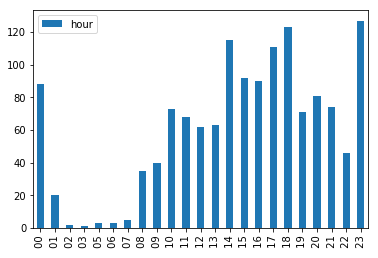

In [19]:
count_hour.plot(kind = "bar")

In [20]:
weekend = data_time[(data_time["day"] == "Saturday")|(data_time["day"] == "Sunday")]

In [21]:
weekdays = data_time[~((data_time["day"] == "Saturday")|(data_time["day"] == "Sunday"))]
weekdays.loc[:,"hour"] = weekdays.loc[:,"hour"].astype(int)

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [22]:
weekend["hour"] = weekend["hour"].astype(int)

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
weekend_usage = weekend.groupby("day")["hour"].sum()

In [24]:
weekend_usage

day
Saturday    2274
Sunday      2324
Name: hour, dtype: int32

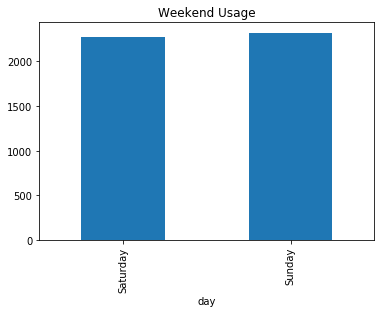

In [25]:
weekend_usage.plot(kind= "bar",title = "Weekend Usage")

In [26]:
weekdays_usage = weekdays.groupby("day")["hour"].sum()

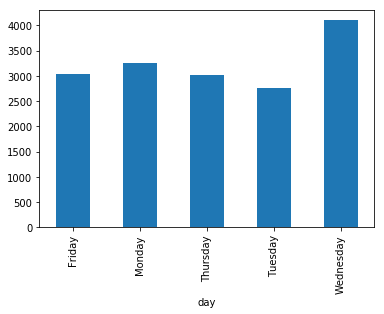

In [27]:
weekdays_usage.plot(kind ="bar")

### How many words do i type on an average in weekdays and weekend??

In [28]:
def word_count(sentence):
    word = sentence.strip().split(" ")
    return len(word)

In [29]:
weekend

,date,user,msg,day,time,hour
377,2016-10-08,+91 88178 32415,<Media omitted>,Saturday,18:41,18
395,2016-08-20,+91 88178 32415,Jo left kre,Saturday,23:18,23
396,2016-08-20,+91 88178 32415,Plz do not add,Saturday,23:18,23
398,2016-08-20,+91 88178 32415,Ohk,Saturday,23:28,23
416,2016-08-20,+91 88178 32415,<Media omitted>,Saturday,23:44,23
...,...,...,...,...,...,...
9064,2019-08-31,+91 88178 32415,Ammar se b harami nikla tu😀😀😀,Saturday,20:03,20
9066,2019-08-31,+91 88178 32415,😀,Saturday,20:04,20
9074,2019-02-09,+91 88178 32415,<Media omitted>,Saturday,16:25,16
9078,2019-06-09,+91 88178 32415,उमर 77 की लेकिन चाल 27 की देखो,Sunday,11:28,11


In [30]:
weekdays["word_count"] = weekdays["msg"].apply(word_count)

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
#weekdays
avg_weekdays_word = weekdays.pivot_table(index ="day", values = "word_count")

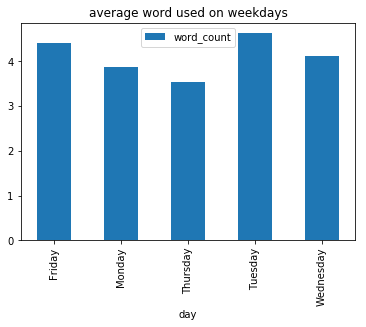

In [32]:
avg_weekdays_word.plot(kind = "bar", title = "average word used on weekdays")

In [33]:
#weekend:
weekend["word_count"] = weekend["msg"].str.strip().str.split(" ").apply(lambda x: len(x))

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
avg_weekend_word = weekend.pivot_table(index="day", values = "word_count")

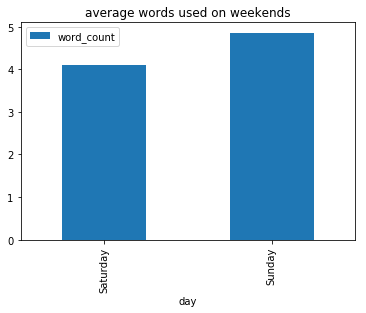

In [35]:
avg_weekend_word.plot(kind= "bar", title= "average words used on weekends")